In [1]:
import astrofix
import numpy as np
from scipy.signal import convolve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
rc('font',**{'family':'serif','serif':['Palatino'],'size': 20})
rc('lines', **{'linewidth':3.0})
rc('axes', **{'labelsize':28})

The example uses an V-band image of the globular cluster NGC 104, taken by the LCO 0.4-meter telescope. It is available at :  
[link]

In [2]:
cluster_img = fits.open('cpt0m407-kb84-20201027-0157-e91.fits.fz')[1].data
print(cluster_img.shape)

(2042, 3054)


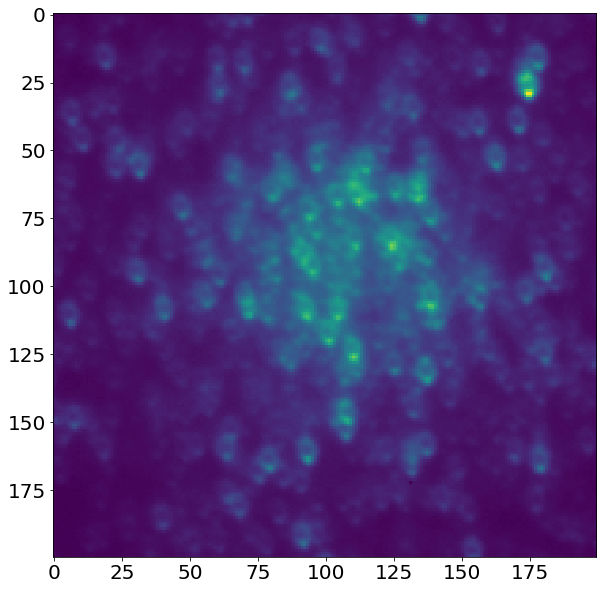

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(cluster_img[950:1150,1400:1600])
plt.show()

To show **astrofix**'s performance on repairing the cluster image, we randomly generate some artificial bad pixels. Let's say we turn 1% of all pixels into NaN. Half of the them stand alone, and the other half of them form crossed shaped regions of bad pixels. You can experiment with other bad pixel fractions and shapes.

In [30]:
img=cluster_img.copy().astype(float)
# 0.5% bad pixel
BP_mask=np.random.rand(img.shape[0],img.shape[1])>0.995
# 0.1% cross shaped regions of bad pixels
cross_mask=np.random.rand(img.shape[0],img.shape[1])>0.999
cross_generator=np.array([[0,1,0],[1,1,1],[0,1,0]])
BP_mask=(BP_mask+convolve(cross_mask,cross_generator,mode="same",method="direct"))!=0
img[BP_mask]=np.nan
print("Number of Bad Pixels: {}".format(np.count_nonzero(BP_mask)))

Number of Bad Pixels: 63346


The image is now populated by NaN pixels:

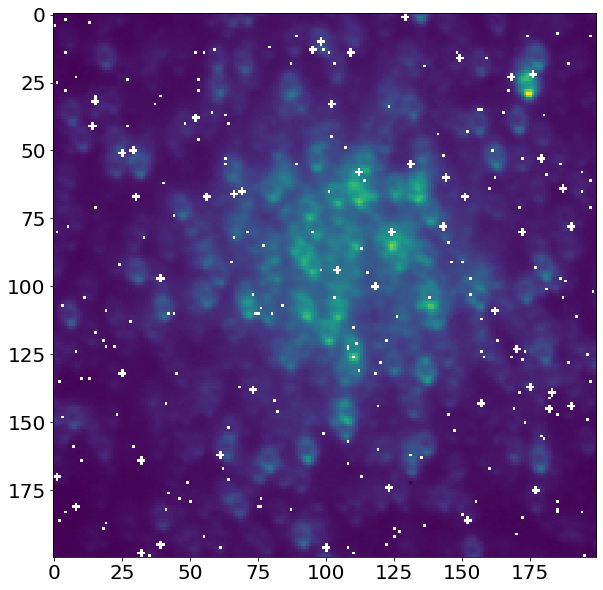

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(img[950:1150,1400:1600])
plt.show()

Now let's repair the image with **astrofix.Fix_Image**:

In [7]:
# Because there is almost no saturation in this image, we set max_clip=1 so that we keep the brightest pixels in the training set.
fixed_img,para,TS=astrofix.Fix_Image(img,"asnan",max_clip=1)
print("a={},h={}".format(para[0],para[1]))
print("Number of training set pixels: {}".format(np.count_nonzero(TS)))

a=3.535197946005144,h=1.4459468660341561
Number of training set pixels: 265461


Compare with the original image:

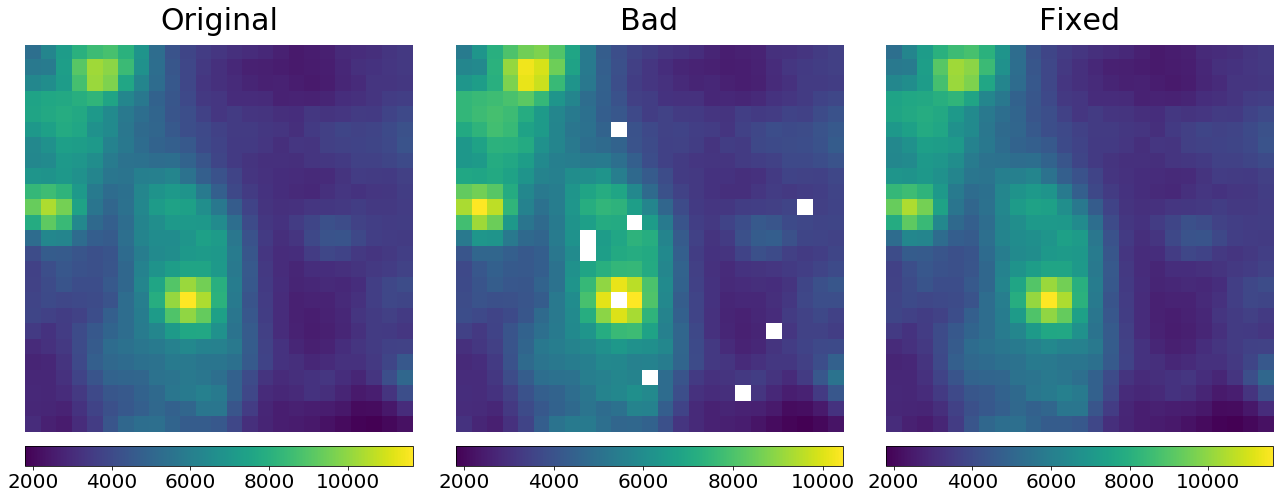

In [32]:
fig,ax=plt.subplots(1,3,figsize=(18,7))
im=ax[0].imshow(cluster_img[1060:1085,1500:1525]) # Choose your region to zoom in
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("bottom", size="5%", pad=0.2)
fig.colorbar(im,ax=ax[0],cax=cax,orientation="horizontal")
ax[0].set_title("Original",fontsize=30,pad=15)
ax[0].axis("off")
im=ax[1].imshow(img[1060:1085,1500:1525])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("bottom", size="5%", pad=0.2)
fig.colorbar(im,ax=ax[1],cax=cax,orientation="horizontal")
ax[1].set_title("Bad",fontsize=30,pad=15)
ax[1].axis("off")
im=ax[2].imshow(fixed_img[1060:1085,1500:1525])
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("bottom", size="5%", pad=0.2)
fig.colorbar(im,ax=ax[2],cax=cax,orientation="horizontal")
ax[2].set_title("Fixed",fontsize=30,pad=15)
ax[2].axis("off")
plt.tight_layout()
plt.show()